In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# 1. Load the dataset

In [2]:
data_obj = fetch_olivetti_faces()
faces = data_obj.data
n_samples, n_features = faces.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


# 2. Mean Centering
We find the 'Average Face' and subtract it from all images

In [3]:
mean_face = np.mean(faces, axis=0)
faces_centered = faces - mean_face

In [4]:
print(f"Dataset loaded: {n_samples} images, each with {n_features} pixels.")

Dataset loaded: 400 images, each with 4096 pixels.


# 3. Perform Singular Value Decomposition
U: Eigenfaces, s: Singular values, Vh: Projection components

In [5]:
U, s, Vh = np.linalg.svd(faces_centered, full_matrices=False)

# 4. Plotting the 'Singular Values' to see information density

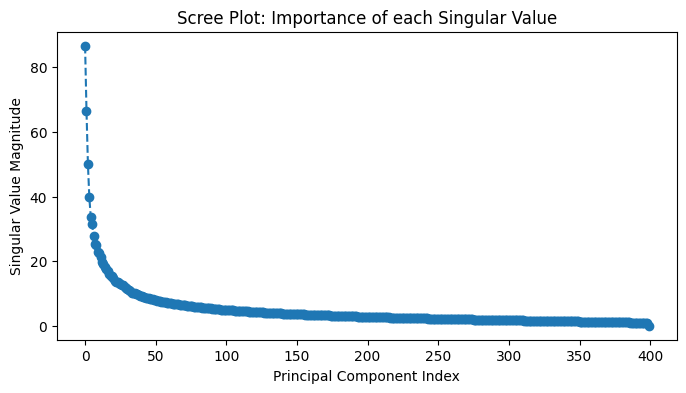

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(s, marker='o', linestyle='--')
plt.title("Scree Plot: Importance of each Singular Value")
plt.xlabel("Principal Component Index")
plt.ylabel("Singular Value Magnitude")
plt.show()

In [7]:
def plot_faces(title, images, n_col=5, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images[:n_col * n_row]):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape(64, 64), cmap='gray')
        plt.xticks(()); plt.yticks(())
    plt.show()

# 5. Visualize the top 10 Eigenfaces

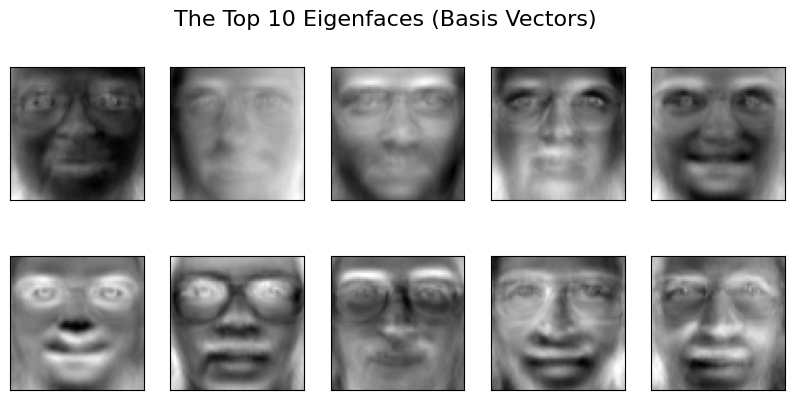

In [8]:
plot_faces("The Top 10 Eigenfaces (Basis Vectors)", Vh)

In [9]:
def reconstruct_face(face_idx, k):
    # Project the centered face onto the first k components
    # Reconstruction = (U_k * S_k * Vh_k) + Mean
    weights = np.dot(faces_centered[face_idx], Vh[:k].T)
    reconstruction = np.dot(weights, Vh[:k]) + mean_face
    return reconstruction

# 6. Pick a random face and compare reconstructions

In [10]:
test_idx = 10
ks = [5, 20, 100, 400]

Text(0.5, 1.0, 'Original')

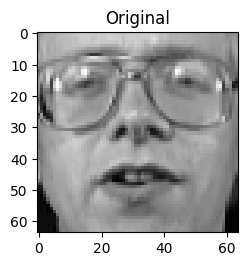

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, len(ks)+1, 1)
plt.imshow(faces[test_idx].reshape(64, 64), cmap='gray')
plt.title("Original")

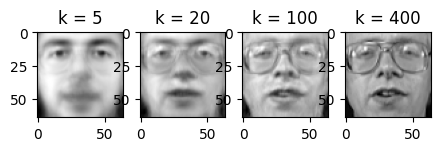

In [12]:
for i, k in enumerate(ks):
    recon = reconstruct_face(test_idx, k)
    plt.subplot(1, len(ks)+1, i+2)
    plt.imshow(recon.reshape(64, 64), cmap='gray')
    plt.title(f"k = {k}")
plt.show()